<a href="https://colab.research.google.com/github/rajan-dhinoja/machine_learning_projects/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for Data manipulation, visualization, and preprocessing...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
pd.set_option('future.no_silent_downcasting', True)

## Step-2: Load & have Fun with the Dataset:-

In [ ]:
# dataset = pd.DataFrame(pd.read_csv('train_set.csv'))
dataset = pd.DataFrame(pd.read_csv('data.csv'))
dataset.head()
# dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,NaN,61000.0,No
4,Germany,40.0,62500.0,Yes


In [ ]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

print("Categorical Columns: \n", categorical_cols, "\n")
print("Numerical Columns: \n", numerical_cols)

Categorical Columns: 
 Index(['Country', 'Purchased'], dtype='object') 

Numerical Columns: 
 Index(['Age', 'Salary'], dtype='object')


In [ ]:
# Different Information of the Dataset...

print("> Shape of the Dataset: \n", dataset.shape)
print("\n")
print("> Information about Dataset: \n")
print(dataset.info())
print("\n")
print("> Statistical summary of the Dataset: \n")
print(dataset.describe().map(lambda x: round(x, 4)) )

> Shape of the Dataset: 
 (11, 4)


> Information about Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     10 non-null     float64
 3   Purchased  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 480.0+ bytes
None


> Statistical summary of the Dataset: 

           Age      Salary
count   9.0000     10.0000
mean   37.3333  63700.0000
std     6.8920  11545.0807
min    27.0000  48000.0000
25%    35.0000  55125.0000
50%    37.0000  61750.0000
75%    40.0000  70750.0000
max    50.0000  83000.0000


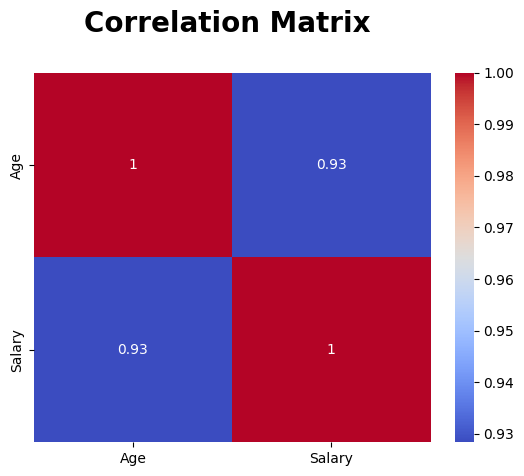

In [ ]:
# Correlation Matrix Heatmap
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

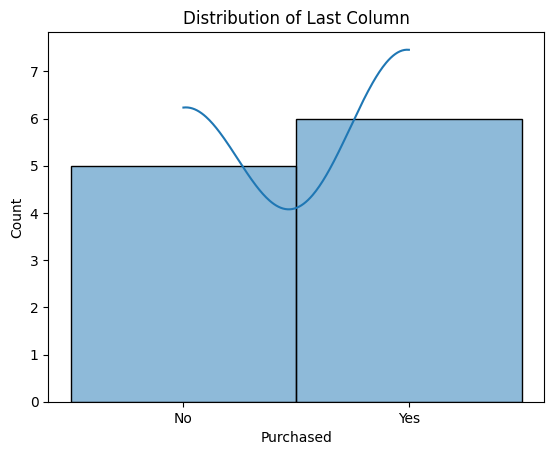

In [ ]:
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

In [ ]:
# # Boxplot for OutletType vs OutletSales
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='OutletType', y='OutletSales', data=dataset)
# plt.xticks(rotation=45)
# plt.title('OutletType vs OutletSales')
# plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [ ]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("No Duplicate Data(or Identical Rows) found...")

No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [ ]:
# # Calculating Missing Data Counts...
# missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()
# print("Missing Data Counts: \n", missing_data_counts)

# X = pd.DataFrame(X)

# # Check if "Unknown" exists in any column
# if X.isin(['Unknown']).any().any():
#     X.replace('Unknown', np.nan, inplace=True)
#     X = X.values
#     print("> All Unknown values Changed... \n \n", X)
# else:
#     print("No 'Unknown' values found in the DataFrame.")

In [ ]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])

      print("\n")
      print("New Data with replaced missing values: \n", dataset)
else:
    print("No missing data found.")



Missing Data Counts in Categorical Columns: 
 Country      2
Purchased    0
dtype: int64


Missing Data Counts in Numerical Columns: 
 Age       2
Salary    1
dtype: int64


New Data with replaced missing values: 
     Country        Age   Salary Purchased
0    France  44.000000  72000.0        No
1     Spain  27.000000  48000.0       Yes
2   Germany  30.000000  54000.0        No
3     Spain  37.333333  61000.0        No
4   Germany  40.000000  62500.0       Yes
5    France  35.000000  63700.0       Yes
6    France  36.000000  52000.0        No
7    France  37.333333  79000.0       Yes
8   Germany  50.000000  83000.0        No
9    France  37.000000  58500.0       Yes
10   France  37.000000  67000.0       Yes


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [ ]:
for col in dataset.columns:
  # Get value counts and convert to DataFrame with column name
  value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

  # Transpose and print with formatting
  print(f"Column: \t'{col}'")
  print(value_counts_dataset.T.to_string(header=False), "\n")


Column: 	'Country'
Unique Values:   France  Germany  Spain
Counts:               6        3      2 

Column: 	'Age'
Unique Values:   37.333333  37.0  44.0  27.0  30.0  40.0  35.0  36.0  50.0
Counts:           2.000000   2.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0 

Column: 	'Salary'
Unique Values:   72000.0  48000.0  54000.0  61000.0  62500.0  63700.0  52000.0  79000.0  83000.0  58500.0  67000.0
Counts:              1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0 

Column: 	'Purchased'
Unique Values:   Yes  No
Counts:            6   5 



In [ ]:
# # # Handling ProductID Column
# dataset['ProductID'] = dataset['ProductID'].apply(lambda x: x[:2])
# # dataset['ProductID'] = dataset['ProductID'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
# print("> After Handling the Prefixes of 'ProductID' Column and changed to new Name:")
# print(dataset['ProductID'].value_counts())

# # print("\n")

# # Handling FatContent Column
# dataset['FatContent'] = dataset['FatContent'].replace({ 'LF': 'Low Fat', 'low fat': 'Low Fat', 'Low fat': 'Low Fat', 'reg': 'Regular'})
# dataset.loc[dataset['ProductID'] == 'NC', 'FatContent'] = 'Non-Edible'
# print("> After Handling the Aliases of 'FatContent' Column:")
# print(dataset['FatContent'].value_counts())

# print("\n")

# # Handling EstablishmentYear Column
# import datetime as dt
# current_year = dt.datetime.today().year
# dataset['OutletAge'] = current_year - dataset['EstablishmentYear']
# dataset = dataset.drop('EstablishmentYear', axis=1)
# print("> 'EstablishmentYear' column is Deleted, Instead 'OutletAge' column is created...")
# print(dataset['OutletAge'].value_counts())

### Step-3.4: Checking any Categorical Data and Encoding them:-

In [ ]:
# `sklearn.compose` is a module in scikit-learn (a popular Python machine learning library) used for combining different data transformations.
# sklearn.preprocessing is a module within scikit-learn that provides tools for preparing your data for machine learning algorithms.
# LabelEncoder is a specific class designed to convert categorical labels (like 'France', 'Spain', 'Germany') into numerical labels (like 0, 1, 2).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values
repeating_cols = []

for col in categorical_cols:
    # Matrix of Feature
    if col != dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'.")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        repeating_cols.append(col)
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
        print(f"\t-'{col}' is Encoded Successfully...\n")

      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

    # Dependent Variable/Output
    elif col == dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'(Output Column).")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}")
        le = LabelEncoder()
        y = le.fit_transform(dataset[col])
        print(f"\t-'{col}' is Encoded Successfully...\n")
      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

print("Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")

if repeating_cols:
    encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
    X = np.array(encoder.fit_transform(X))

> String Values present in Column 'Country'.
	- Also, Categorical values found in column 'Country': ['France', 'Germany', 'Spain'].
	-'Country' is Encoded Successfully...

> String Values present in Column 'Purchased'(Output Column).
	- Also, Categorical values found in column 'Purchased': ['Yes', 'No']
	-'Purchased' is Encoded Successfully...

Repeating Columns:  ['Country'] 



In [ ]:
print("> Encoded data of Matrix of Features/Independent variable (X): \n",X, "\n")
print("> Encoded data of Dependent Variable (y): \n",y)

> Encoded data of Matrix of Features/Independent variable (X): 
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00 4.40000000e+01
  7.20000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+01
  5.40000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.73333333e+01
  6.10000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.25000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  6.37000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.60000000e+01
  5.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.73333333e+01
  7.90000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.00000000e+01
  8.30000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  5.85000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]] 

> Encoded data of Dependent Variable (y): 
 [0 1 0 0

## Step-4: Split the Dataset into the Training set and Test set:-

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Printing Training Sets:")
print("> X_train: \n", X_train)
print("> X_test: \n", X_test)
print("\n")
print("Printing Test Sets:")
print("> y_train: \n", y_train)
print("> y_test: \n", y_test)

Printing Training Sets:
> X_train: 
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+01
  5.40000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.00000000e+01
  8.30000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.25000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.73333333e+01
  7.90000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.73333333e+01
  6.10000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.60000000e+01
  5.20000000e+04]]
> X_test: 
 [[1.00e+00 0.00e+00 0.00e+00 3.50e+01 6.37e+04]
 [1.00e+00 0.00e+00 0.00e+00 4.40e+01 7.20e+04]
 [1.00e+00 0.00e+00 0.00e+00 3.70e+01 5.85e+04]]


Printing Test Sets:
> y_train: 
 [1 0 1 0 1 1 0 0]
> y_test: 
 [1 0 1]


## Step-5: Feature Scaling:-

In [ ]:
# """ Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# # StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train[:, 3: ] = sc.fit_transform(X_train[:, 3:])
# X_test[:, 3: ] = sc.transform(X_test[:, 3:])

# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", X_train)
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", X_test)

# ***Step-B: Model Builing (Regression):-***

## Step-1: Model Building

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)

## Step-2: Predicting a new result

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)